# Decomposição em Valores Singulares (SVD)

## Introdução

A Decomposição em Valores Singulares (SVD, do inglês *Singular Value Decomposition*) é uma ferramenta fundamental na matemática aplicada, especialmente útil em contextos como redução de dimensionalidade, processamento de sinais e estatística. Vamos começar com uma introdução aos conceitos básicos necessários para entender o SVD:

### Transformações e Operadores Lineares

Uma transformação linear é uma função entre dois espaços vetoriais que preserva as operações de adição de vetores e multiplicação por escalar. Formalmente, uma função $T: V \rightarrow W$ é linear se, para todos os vetores $u, v \in V$ e todo escalar $c$, as seguintes condições são satisfeitas:

$$
 T(u + v) = T(u) + T(v) 
$$

$$
 T(cu) = cT(u) 
$$

Os operadores lineares são um caso especial de transformações lineares, onde o domínio e o contradomínio são o mesmo espaço vetorial, ou seja, $T: V \rightarrow V$.

### Produto Interno e Norma

**Definição Produto Interno**

O produto interno em um espaço vetorial é uma função que associa a cada par de vetores um escalar, fornecendo uma noção de ângulo e comprimento. No espaço $\mathbb{R}^n$, o produto interno padrão é definido como:
$$
 \langle u, v \rangle = u_1 v_1 + u_2 v_2 + \cdots + u_n v_n 
$$

**Definição Norma**

A norma de um vetor, derivada do produto interno, é definida como:
$$
 \|v\| = \sqrt{\langle v, v \rangle} 
$$

Essa norma é uma medida do comprimento (ou magnitude) do vetor.

### Operadores Ortogonais e Adjunção

**Definição Operador Ortonormal**

Um operador ortogonal (ou isometria) em um espaço com produto interno é aquele que preserva o produto interno entre quaisquer dois vetores. Se $A$ é um operador ortogonal, então:

$$
 \langle Av, Aw \rangle = \langle v, w \rangle 
$$

para todos$v, w$. Isso implica que$A$preserva ângulos e comprimentos, e sua matriz, em relação a uma base ortonormal, é uma matriz ortogonal, ou seja,$A^{-1} = A^T$, onde$A^T$é a transposta de$A$.

**Definição Transformação Adjunta**

A adjunta de uma transformação linear $A:V\rightarrow W$ entre espaços com produtos internos é a transformação  $A^*:W\rightarrow V$ tal que:

$$
 \langle Av, w \rangle = \langle v, A^*w \rangle 
$$

para todos $v, w$. Para matrizes reais, a adjunta corresponde à transposta, e para matrizes complexas, à conjugada transposta.


## Codificando as operações básicas

A seguir apresentamos a implementação do do produto interno, norma e transposição. Lembrando que em aplicações práticas estamos trabalhando com espaços vetoriais finitos, onde as transformações lineares são representadas pelas [matrizes](representação-matricial.md). Além disso, nas funções a seguir consideramos espaços vetoriais sobre o corpo $\mathbb{R}$ dos reais, sendo assim, a transposta de uma matriz corresponde à matriz da transformação adjunta.

In [1]:
import numpy as np

# Função para calcular o produto de duas matrizes
def dot_product(A, B):
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape

    if cols_A != rows_B:
        raise ValueError("O número de colunas de A deve ser igual ao número de linhas de B")

    C = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i, j] += A[i, k] * B[k, j]

    return C

# Função para calcular a transposta de uma matriz
def transpose(A):
    rows_A, cols_A = A.shape
    B = np.zeros((cols_A, rows_A))

    for i in range(rows_A):
        for j in range(cols_A):
            B[j, i] = A[i, j]

    return B

# Função para calcular a norma de um vetor
def norm(vector):
    return np.sqrt(np.sum(vector**2, axis=0))

## Decomposição em Valores Singulares (SVD)

A Decomposição em Valores Singulares (SVD) é uma técnica matemática que generaliza a diagonalização de matrizes simétricas a qualquer matriz retangular. Vamos passar pelo processo de construção da SVD, destacando os conceitos-chave e os passos envolvidos.

### Definição

Para uma matriz $A$ de dimensão $m \times n$ sobre $\mathbb{R}$ ou $\mathbb{C}$, a SVD de $A$ é uma decomposição da forma:
$$
A = U \Sigma V^*
$$
onde:
- $U$ é uma matriz $m \times m$ ortogonal (ou unitária se sobre $\mathbb{C}$), chamada de matriz dos vetores singulares à esquerda.
- $V$ é uma matriz $n \times n$ ortogonal (ou unitária se sobre $\mathbb{C}$), chamada de matriz dos vetores singulares à direita.
- $\Sigma$ é uma matriz $m \times n$ diagonal retangular com elementos não-negativos na diagonal, conhecidos como valores singulares.

### Passos para a Construção do SVD

1. **Matrizes $A^*A$ e $AA^*$**:
   - $A^*$ é a adjunta (ou transposta conjugada) de $A$.
   - $A^*A$ e $AA^*$ são matrizes simétricas e semi-definidas positivas.

2. **Autovalores e Autovetores**:
   - Encontre os autovalores de $A^*A$ e $AA^*$. Estes são reais e não-negativos, pois as matrizes são semi-definidas positivas.
   - Os autovalores de $A^*A$ (e $AA^*$) são os quadrados dos valores singulares de $A$.
   - Determine os autovetores de $A^*A$ e $AA^*$, que serão as colunas de $V$ e $U$, respectivamente.

3. **Construção de $\Sigma$**:
   - Os valores singulares de $A$ são as raízes quadradas dos autovalores de $A^*A$ (ou $AA^*$), ordenados de forma decrescente.
   - $\Sigma$ é formada ao colocar esses valores singulares na diagonal principal, com as dimensões de $m \times n$, sendo os outros elementos todos zero.

4. **Formação de $U$ e $V$**:
   - Os vetores singulares à direita $V$ são os autovetores de $A^*A$.
   - Os vetores singulares à esquerda $U$ são obtidos através dos autovetores de $AA^*$ ou, alternativamente, podem ser calculados por $AV = U\Sigma$ para obter $U$.

In [2]:
# Função para realizar a decomposição SVD
def svd_decomposition(A):    
    # Matriz A^T A
    ATA = np.dot(A.T, A)

    # Autovetores e autovalores da matriz A^T A
    eigenvalues, eigenvectors = np.linalg.eig(ATA)

    # Ordena os autovetores em ordem decrescente em relação aos autovalores
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Monta matriz de valores singulares
    rows_A, cols_A = A.shape
    sigma = np.zeros((rows_A, cols_A))
    for i in range(min(rows_A, cols_A)):
        sigma[i, i] = np.sqrt(eigenvalues[i])

    # Calcular as matrizes U e VT
    VT = eigenvectors.T
    # Cálculo de U usando A * V * sigma_inv
    sigma_inv = np.diag(1 / sigma.diagonal())
    U = np.dot(A, np.dot(eigenvectors, sigma_inv))

    # Normalizar as colunas de U
    U = U / norm(U)

    return U, sigma, VT

### Teste da Implementação SVD

In [3]:
# Matriz de entrada
A = np.array([[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]])

# Realizar a decomposição SVD
U, S, VT = svd_decomposition(A)

print("Matriz A:")
print(A)

# Matriz U
print("\nMatriz U:")
print(U)

# Matriz de valores singulares
print("\nMatriz de valores singulares:")
print(S)

# Matriz VT
print("\nMatriz VT:")
print(VT)

print("\nRealizando o Produto:")
print(dot_product(dot_product(U, S), VT))

Matriz A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matriz U:
[[-0.21483724  0.88723069  0.86869327]
 [-0.52058739  0.24964395  0.21717332]
 [-0.82633754 -0.38794278 -0.4452053 ]]

Matriz de valores singulares:
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.53406751e-08]]

Matriz VT:
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [ 0.40824829 -0.81649658  0.40824829]]

Realizando o Produto:
[[1.00000003 1.99999994 3.00000003]
 [4.00000001 4.99999998 6.00000001]
 [6.99999998 8.00000003 8.99999998]]


### Exemplo utilizando SVD da biblioteca numpy

In [4]:
# Utilizando a função da biblioteca numpy
U, s, VT = np.linalg.svd(A)

S = np.zeros_like(A, dtype=float)
S[:3, :3] = np.diag(s)

print("Matriz A:")
print(A)

# Matriz U
print("\nMatriz U:")
print(U)

# Matriz de valores singulares
print("\nMatriz de valores singulares:")
print(S)

# Matriz VT
print("\nMatriz VT:")
print(VT)

print("\nRealizando o Produto:")
print(np.dot(np.dot(U, S), VT))

Matriz A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matriz U:
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

Matriz de valores singulares:
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]

Matriz VT:
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]

Realizando o Produto:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### Interpretação Geométrica da SVD

Geometricamente, a SVD decompõe uma transformação em três componentes sequenciais: rotação inicial, escalonamento e rotação final, cada uma representada por uma das matrizes na decomposição $A = U \Sigma V^*$.

1. **Rotação Inicial ($V^*$)**: 
   - A matriz $V$ (e por transposição, $V^*$) contém os vetores singulares à direita de $A$, que formam uma base ortogonal. Geometricamente, $V^*$ realiza uma rotação (ou reflexão, dependendo da orientação dos vetores) do espaço de entrada. Esta transformação alinha os eixos do espaço de entrada com os eixos principais de escalonamento de $A$.

2. **Escalonamento ($\Sigma$)**:
   - A matriz $\Sigma$ é uma matriz diagonal com os valores singulares de $A$ em sua diagonal. Esses valores representam as escalas de dilatação ou contração ao longo dos eixos principais definidos por $V^*$. Cada valor singular em $\Sigma$ multiplica a magnitude dos vetores ao longo de seu respectivo eixo, dilatando (se maior que 1) ou contraindo (se menor que 1) o vetor nessa dimensão. Isso ilustra a "força" ou a "influência" de $A$ em diferentes direções do espaço.

3. **Rotação Final ($U$)**:
   - Após a transformação pelos valores singulares, a matriz $U$ aplica uma segunda rotação (ou reflexão) ao espaço. Esta rotação orienta os resultados do escalonamento em direção ao espaço de saída. Os vetores singulares à esquerda em $U$ formam uma base onde cada vetor é orientado para maximizar a projeção dos dados transformados por $\Sigma$, ajustando efetivamente os dados transformados para se encaixarem no espaço de saída.


### Exemplo

A seguir aplicamos o SVD em um operador bidimensional e apresentamos um gráfico ilustrativo de como o circulo unitário é transformado pela ação do operador e pelos operadores componentes da decomposição SVD.

Matriz A:
[[ 2  1]
 [ 1 -1]]

Matriz U:
[[ 0.95709203  0.28978415]
 [ 0.28978415 -0.95709203]]

Matriz S de valores singulares:
[[2.30277564 0.        ]
 [0.         1.30277564]]

Matriz VT:
[[ 0.95709203  0.28978415]
 [-0.28978415  0.95709203]]

Realizando o Produto:
[[ 2.  1.]
 [ 1. -1.]]


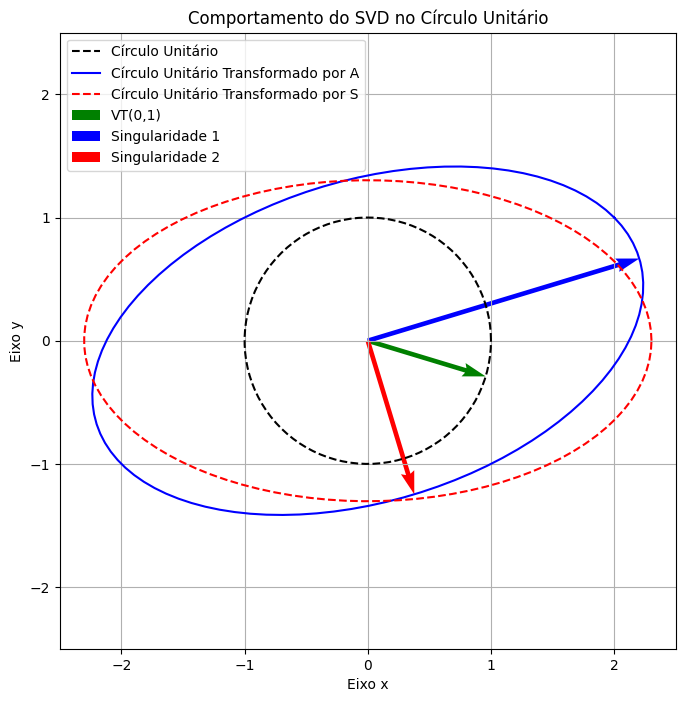

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar pontos em um círculo unitário
theta = np.linspace(0, 2*np.pi, 100) # ângulos theta de 0 a 2*pi
x = np.cos(theta) # coordenada x
y = np.sin(theta) # coordenada y

# Matriz de entrada para o SVD
A = np.array([[2,  1], 
              [1, -1]])

# Realizar a decomposição SVD
U, S, VT = svd_decomposition(A)

print("Matriz A:")
print(A)

# Matriz U
print("\nMatriz U:")
print(U)

# Matriz de valores singulares
print("\nMatriz S de valores singulares:")
print(S)

# Matriz VT
print("\nMatriz VT:")
print(VT)

print("\nRealizando o Produto:")
print(dot_product(dot_product(U, S), VT))

# Plotar o círculo unitário
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'k--', label='Círculo Unitário')

# Aplicar a matriz A nos pontos x e y
xy = np.stack([x, y])
xy_transformed = A @ xy
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'b', label='Círculo Unitário Transformado por A')

xy_transformed = S @ xy
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'r--', label='Círculo Unitário Transformado por S')

u = np.dot(VT, [1, 0])
plt.quiver(0, 0, u[0], u[1],
            angles='xy', scale_units='xy', scale=1, color='g',
            label='VT(0,1)')

# Plotar os vetores de singularidade
c = ['b', 'r']
for i in range(2):
    plt.quiver(0, 0, U[i, 0]*S[i, i], U[i, 1]*S[i, i],
               angles='xy', scale_units='xy', scale=1, color=c[i],
               label=f'Singularidade {i+1}')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Comportamento do SVD no Círculo Unitário')
plt.legend()
plt.grid(True)
plt.show()

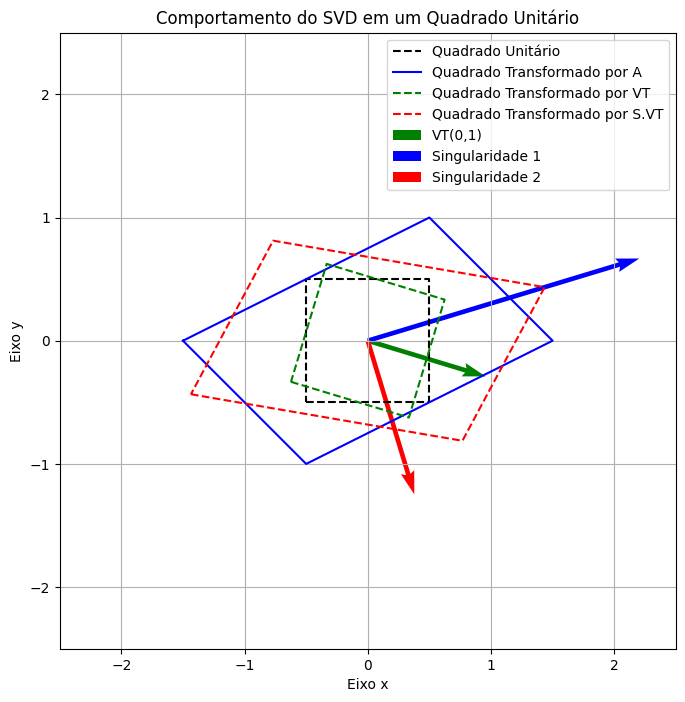

In [6]:
# Gerar pontos em um quadrado unitário centralizado
t = np.linspace(-0.5, 0.5, 25)
x = np.concatenate([t, 0.5 * np.ones_like(t), t[::-1], -0.5 * np.ones_like(t)])
y = np.concatenate([-0.5 * np.ones_like(t), t, 0.5 * np.ones_like(t), t[::-1]])


# Matriz de entrada para o SVD
A = np.array([[2,  1], 
              [1, -1]])

# Realizar a decomposição SVD
U, S, VT = svd_decomposition(A)

# Plotar o quadrado unitário
plt.figure(figsize=(8, 8))
plt.plot(np.append(x, x[0]), np.append(y, y[0]), 'k--', label='Quadrado Unitário')

# Aplicar a matriz A nos pontos x e y
xy = np.stack([x, y])
xy_transformed = np.dot(A, xy)
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'b', label='Quadrado Transformado por A')


xy_transformed = np.dot(VT, xy)
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'g--', label='Quadrado Transformado por VT')

xy_transformed = np.dot(S, xy_transformed)
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'r--', label='Quadrado Transformado por S.VT')

u = np.dot(VT, [1, 0])
plt.quiver(0, 0, u[0], u[1],
            angles='xy', scale_units='xy', scale=1, color='g',
            label='VT(0,1)')

# Plotar os vetores de singularidade
c = ['b', 'r']
for i in range(2):
    plt.quiver(0, 0, U[i, 0]*S[i, i], U[i, 1]*S[i, i],
               angles='xy', scale_units='xy', scale=1, color=c[i],
               label=f'Singularidade {i+1}')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Comportamento do SVD em um Quadrado Unitário')
plt.legend()
plt.grid(True)
plt.show()


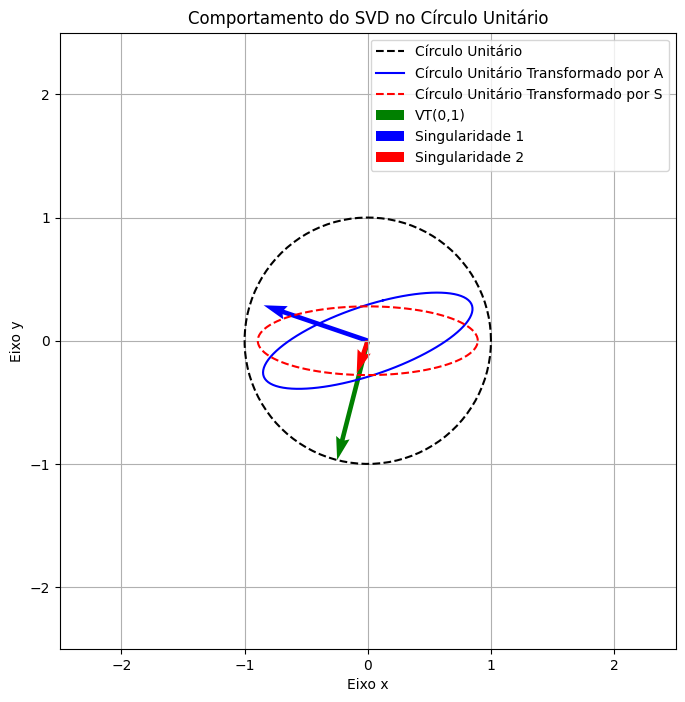

In [7]:
# Gerar pontos em um círculo unitário
theta = np.linspace(0, 2*np.pi, 100) # ângulos theta de 0 a 2*pi
x = np.cos(theta) # coordenada x
y = np.sin(theta) # coordenada y

# Matriz de entrada para o SVD
A = np.random.random((2, 2))

# Realizar a decomposição SVD
U, S, VT = svd_decomposition(A)

# Plotar o círculo unitário
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'k--', label='Círculo Unitário')

# Aplicar a matriz A nos pontos x e y
xy = np.stack([x, y])
xy_transformed = A @ xy
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'b', label='Círculo Unitário Transformado por A')

xy_transformed = S @ xy
plt.plot(xy_transformed[0, :], xy_transformed[1, :], 'r--', label='Círculo Unitário Transformado por S')

u = np.dot(VT, [1, 0])
plt.quiver(0, 0, u[0], u[1],
            angles='xy', scale_units='xy', scale=1, color='g',
            label='VT(0,1)')

# Plotar os vetores de singularidade
c = ['b', 'r']
for i in range(2):
    plt.quiver(0, 0, U[i, 0]*S[i, i], U[i, 1]*S[i, i],
               angles='xy', scale_units='xy', scale=1, color=c[i],
               label=f'Singularidade {i+1}')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Comportamento do SVD no Círculo Unitário')
plt.legend()
plt.grid(True)
plt.show()

### Aplicações Práticas

O SVD é amplamente utilizado em compressão de dados, redução de ruído em sinais, análise estatística como a análise de componentes principais (PCA), e mais, devido à sua capacidade de extrair as características essenciais da matriz original.